In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
#Defining hyperparameters
vocab_size = 1000
embedding_dim = 32
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

#Loading json file
!wget --no-check-certificate -nc 'https://docs.google.com/uc?export=download&id=1-EF-p8RN3Aia02P9zv55oxSibQOQQacH' -O sarcasm.json

with open("sarcasm.json", 'r') as f:
    datastore = json.load(f)

#Extracting data points
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

File ‘sarcasm.json’ already there; not retrieving.


In [16]:
#Preparing training and test dataset
training_sentences = sentences[0:training_size]  #0;20000
testing_sentences = sentences[training_size:]    #20000:end

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#Texts to sequences and padding
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#Converting to arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [17]:
#Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 16, 32)            32000     
                                                                 
 global_average_pooling1d_3   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                792       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 32,817
Trainable params: 32,817
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Training the model 
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.5156 - accuracy: 0.7357 - val_loss: 0.4051 - val_accuracy: 0.8156 - 3s/epoch - 4ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3767 - accuracy: 0.8296 - val_loss: 0.3992 - val_accuracy: 0.8128 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3638 - accuracy: 0.8341 - val_loss: 0.4009 - val_accuracy: 0.8125 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.3584 - accuracy: 0.8382 - val_loss: 0.4019 - val_accuracy: 0.8129 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.3555 - accuracy: 0.8387 - val_loss: 0.4035 - val_accuracy: 0.8143 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.3544 - accuracy: 0.8388 - val_loss: 0.4055 - val_accuracy: 0.8140 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.3531 - accuracy: 0.8393 - val_loss: 0.4120 - val_accuracy: 0.8058 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.3506 - accuracy: 0.8401 - val_loss: 0.4051 - val_accuracy: 0.8150 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

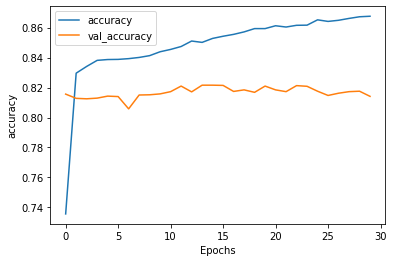

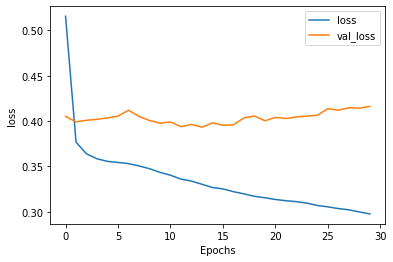

In [19]:
#Plotting the results
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#Validation loss hight quite a lot (This is common with text data - Accuracy is same or go down slightly but the confidence in making that prediction is low (Over the period of time 
#model becomes less confident with the classfication process))
#Vocab_size - too many words increases the complexity
#Try changing the hyperparameters max_length (like 16) and vocab_size (like 1000), embedding_dim (like 32)